In [7]:
import logging
import math
import os
import sys

from openmmtools import mcmc, multistate, states, testsystems
from openmmtools.multistate import ReplicaExchangeSampler, MultiStateSampler
from openmmtools.states import SamplerState, ThermodynamicState
from simtk import unit

import time
import tqdm

In [3]:
# remove old files from last run

try:
    os.remove("/data/chodera/zhangi/perses_benchmark/repex/31/0/4/alanine_dipeptide_checkpoint.nc")
    os.remove("/data/chodera/zhangi/perses_benchmark/repex/31/0/4/alanine_dipeptide.nc")
except (FileNotFoundError):
    pass

# Set up logger
logging.basicConfig(stream=sys.stderr, level=logging.DEBUG)
_logger = logging.getLogger()

_logger.info("Generating system")
testsystem = testsystems.AlanineDipeptideExplicit()

_logger.info("Generating states")
n_replicas = 11  # Number of temperature replicas.
T_min = 300.0 * unit.kelvin  # Minimum temperature.
T_max = 600.0 * unit.kelvin  # Maximum temperature.
temperatures = [
    T_min
    + (T_max - T_min)
    * (math.exp(float(i) / float(n_replicas - 1)) - 1.0)
    / (math.e - 1.0)
    for i in range(n_replicas)
]
#temperatures = [T_min, T_max]
thermodynamic_states = [
    ThermodynamicState(system=testsystem.system, temperature=T) for T in temperatures
]

_logger.info("Generating move")
move = mcmc.LangevinSplittingDynamicsMove(
    timestep=4.0 * unit.femtoseconds,
    n_steps=250,
    collision_rate=5.0 / unit.picosecond,
    reassign_velocities=False,
    n_restart_attempts=20,
    constraint_tolerance=1e-06,
)

sampler_state = SamplerState(testsystem.positions, box_vectors=testsystem.system.getDefaultPeriodicBoxVectors())

INFO:root:Generating system
INFO:root:Generating states
INFO:root:Generating move


In [10]:
times = []
for i in tqdm.tqdm_notebook(range(1000)):
    initial_time = time.time()
    move.apply(thermodynamic_states[0], sampler_state)
    elapsed_time = (time.time() - initial_time) * unit.seconds
    print(elapsed_time)
    times.append(elapsed_time)

<ipython-input-10-3f0c9fbd0a87>:2: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm.tqdm_notebook(range(1000)):


  0%|          | 0/1000 [00:00<?, ?it/s]

0.13205361366271973 s
0.1258556842803955 s
0.12381601333618164 s
0.1178135871887207 s
0.11992001533508301 s
0.1177978515625 s
0.12026190757751465 s
0.11807107925415039 s
0.11931228637695312 s
0.11700797080993652 s
0.1191565990447998 s
0.11743450164794922 s
0.11985492706298828 s
0.11769843101501465 s
0.11902594566345215 s
0.11769437789916992 s
0.11875128746032715 s
0.11732292175292969 s
0.1187276840209961 s
0.11784243583679199 s
0.11904621124267578 s
0.11762404441833496 s
0.11946797370910645 s
0.11831331253051758 s
0.11918902397155762 s
0.1181647777557373 s
0.12068414688110352 s
0.11841464042663574 s
0.12068843841552734 s
0.11893367767333984 s
0.12242341041564941 s
0.1192786693572998 s
0.12111115455627441 s
0.11893677711486816 s
0.12100100517272949 s
0.11934924125671387 s
0.12029743194580078 s
0.11846542358398438 s
0.12092351913452148 s
0.11868715286254883 s
0.12119865417480469 s
0.11875724792480469 s
0.12083578109741211 s
0.11974787712097168 s
0.12108874320983887 s
0.11846590042114258 

0.12190890312194824 s
0.11960148811340332 s
0.12230706214904785 s
0.12055730819702148 s
0.12313628196716309 s
0.12074685096740723 s
0.12306356430053711 s
0.12033438682556152 s
0.12264609336853027 s
0.12024211883544922 s
0.12106466293334961 s
0.11955070495605469 s
0.12071537971496582 s
0.11929035186767578 s
0.12105917930603027 s
0.11908388137817383 s
0.12104964256286621 s
0.11895442008972168 s
0.12105202674865723 s
0.1194460391998291 s
0.1204977035522461 s
0.11915755271911621 s
0.12062644958496094 s
0.11896395683288574 s
0.12064337730407715 s
0.11924123764038086 s
0.1204690933227539 s
0.11922979354858398 s
0.12101292610168457 s
0.11963796615600586 s
0.12121701240539551 s
0.11970067024230957 s
0.12113022804260254 s
0.11903071403503418 s
0.12101411819458008 s
0.1203908920288086 s
0.12115001678466797 s
0.1196589469909668 s
0.12118005752563477 s
0.11979508399963379 s
0.12101030349731445 s
0.11960482597351074 s
0.12135434150695801 s
0.11963009834289551 s
0.12106204032897949 s
0.1192665100097

0.1214449405670166 s
0.11932063102722168 s
0.12120699882507324 s
0.11956906318664551 s
0.12123513221740723 s
0.11959362030029297 s
0.12132024765014648 s
0.11988210678100586 s
0.12171530723571777 s
0.11979532241821289 s
0.12119245529174805 s
0.12011885643005371 s
0.12280845642089844 s
0.12085151672363281 s
0.12248826026916504 s
0.12031435966491699 s
0.12183356285095215 s
0.1205606460571289 s
0.12203121185302734 s
0.1194460391998291 s
0.12126660346984863 s
0.1196756362915039 s
0.12109971046447754 s
0.11960530281066895 s
0.12078857421875 s
0.11947107315063477 s
0.12053704261779785 s
0.11938834190368652 s
0.12131810188293457 s
0.11965346336364746 s
0.12124133110046387 s
0.11938738822937012 s
0.1200265884399414 s
0.11901640892028809 s
0.12100887298583984 s
0.11912083625793457 s
0.12066793441772461 s
0.1185915470123291 s
0.1205739974975586 s
0.11923432350158691 s
0.12060904502868652 s
0.1190037727355957 s
0.12089276313781738 s
0.1190648078918457 s
0.12055110931396484 s
0.1188664436340332 s
0

In [25]:
times_nounits = []
for time in times:
    times_nounits.append(time.value_in_unit(unit.seconds))

In [11]:
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

DEBUG:matplotlib:matplotlib data path: /home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/matplotlib/mpl-data
DEBUG:matplotlib:CONFIGDIR=/home/zhangi/.config/matplotlib
DEBUG:matplotlib:matplotlib version 3.4.1
DEBUG:matplotlib:interactive is False
DEBUG:matplotlib:platform is linux
DEBUG:matplotlib:loaded modules: ['sys', 'builtins', '_frozen_importlib', '_imp', '_warnings', '_frozen_importlib_external', '_io', 'marshal', 'posix', '_thread', '_weakref', 'time', 'zipimport', '_codecs', 'codecs', 'encodings.aliases', 'encodings', 'encodings.utf_8', '_signal', '__main__', 'encodings.latin_1', '_abc', 'abc', 'io', '_stat', 'stat', '_collections_abc', 'genericpath', 'posixpath', 'os.path', 'os', '_sitebuiltins', '_locale', '_bootlocale', 'types', 'importlib._bootstrap', 'importlib._bootstrap_external', 'warnings', 'importlib', 'importlib.machinery', 'importlib.abc', '_operator', 'operator', 'keyword', '_heapq', 'heapq', 'itertools', 'reprlib', '_collections', 'collect

DEBUG:matplotlib:CACHEDIR=/home/zhangi/.cache/matplotlib
DEBUG:matplotlib.font_manager:Using fontManager instance from /home/zhangi/.cache/matplotlib/fontlist-v330.json
DEBUG:matplotlib.pyplot:Loaded backend module://ipykernel.pylab.backend_inline version unknown.
DEBUG:matplotlib.pyplot:Loaded backend module://ipykernel.pylab.backend_inline version unknown.


Text(0.5, 1.0, 'alanine dipeptide')

DEBUG:matplotlib.font_manager:findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=12.0.
DEBUG:matplotlib.font_manager:findfont: score(<Font 'cmb10' (cmb10.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'DejaVu Sans Mono' (DejaVuSansMono-Oblique.ttf) oblique normal 400 normal>) = 11.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'STIXGeneral' (STIXGeneral.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'cmtt10' (cmtt10.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'DejaVu Sans Display' (DejaVuSansDisplay.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'STIXSizeFourSym' (STIXSizFourSymReg.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'cmss10' (cmss10.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager

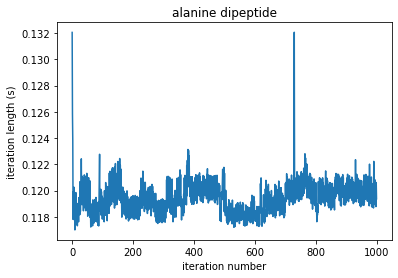

In [27]:
plt.plot(times_nounits)
plt.xlabel('iteration number')
plt.ylabel('iteration length (s)')
plt.title('alanine dipeptide')